<a href="https://colab.research.google.com/github/bcasazharuddin/Automata-_Theory/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment :** Illustrate the process of coverting NFA with null edge to a Regular expession.

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Cloning into 'Jove'...
remote: Enumerating objects: 5094, done.
remote: Counting objects: 100% (460/460), done.
remote: Compressing objects: 100% (321/321), done.
remote: Total 5094 (delta 265), reused 308 (delta 124), pack-reused 4634
Receiving objects: 100% (5094/5094), 7.64 MiB | 17.66 MiB/s, done.
Resolving deltas: 100% (3270/3270), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help

In [ ]:
NFA = md2mc('''NFA
Iq0 :a -> Iq0
Iq0 : '' -> q1
q1 : a -> q2
q2 : b -> q1
q1 : '' -> Fq3
Fq3 : a -> Fq3
Fq3 : b -> Fq3

''')  

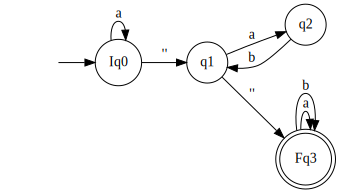

In [ ]:
dotObj_nfa(NFA)

# Convertion of NFA with null edges into an RE

In [ ]:
GN1NFA = mk_gnfa(NFA)

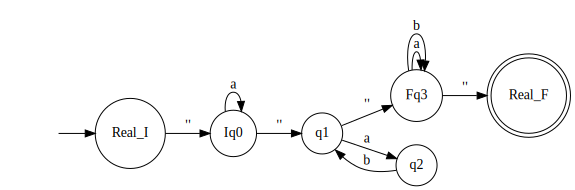

In [ ]:
dotObj_gnfa(GN1NFA)

In [ ]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [ ]:
(Gfinal, DO, REfinalnaf) = del_gnfa_states(GN1NFA)

**** Eliminating state Iq0 ****
**** Eliminating state Fq3 ****
**** Eliminating state q1 ****
**** Eliminating state q2 ****


In [ ]:
REfinalnaf

'(((((a)* a) (((b a))* (b ((a + b))*))) + ((a)* ((a + b))*)) + ((a)* ((a + b))*))'

Generating LALR tables


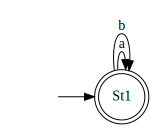

In [ ]:
dotObj_dfa( min_dfa(nfa2dfa(re2nfa(REfinalnaf))))

Generating LALR tables


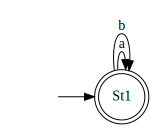

In [ ]:
dotObj_dfa( min_dfa(nfa2dfa(re2nfa('(((((a)* a) (((b a))* (b ((a + b))*))) + ((a)* ((a + b))*)) + ((a)* ((a + b))*))'))))